In [3]:
station_url = 'http://opendap.deltares.nl/thredds/dodsC/opendap/rijkswaterstaat/waterbase/27_Waterhoogte_in_cm_t.o.v._normaal_amsterdams_peil_in_oppervlaktewater/nc/id1-STAVNSE.nc'
    
    

In [5]:
import xarray as xr
import netCDF4

In [8]:
ds = xr.open_dataset('/Users/baart_f/src/sealevel/data/waterbase/id1-STAVNSE.nc')

In [16]:
series = ds.sea_surface_height.to_dataframe()['sea_surface_height'].loc[0]
series  = series.reset_index()

In [18]:
series['year'] = series['time'].apply(lambda x:x.year)

In [25]:
df = series[['sea_surface_height', 'year']].groupby('year').agg(['mean', 'count'])
df

sea_surface_height       
                   mean  count
year                          
1970          -1.245000      2
1971          -0.011469   8760
1972          -0.035336   8784
1973           0.009277   8760
1974           0.026325   8760
1975          -0.008188   8760
1976          -0.001161   8784
1977           0.050029   8760
1978           0.009959   8760
1979           0.002468   8760
1980           0.048503   8784
1981           0.078837   8760
1982           0.067776   8760
1983           0.091253   8760
1984           0.035513   8784
1985           0.030282   8760
1986           0.006646   8765
1987          -0.010240  52560
1988           0.054770  52704
1989           0.034726  52560
1990           0.048239  52560
1991          -0.028209  52560
1992           0.012377  52704
1993           0.009717  52560
1994           0.032954  52560
1995           0.042508  52560
1996          -0.050936  52704
1997          -0.011881  52560
1998           0.057232  52560
1999           0.049855  52560
2000           0.037509  52704
2001           0.054409  52560
2002           0.040889  52560
2003           0.035663  52560
2004           0.050524  52704
2005           0.018332  52560
2006           0.016279  52560
2007           0.060814  52560
2008           0.033096  52704
2009           0.019221  52560
2010           0.022874  52560
2011           0.036918  52560
2012           0.021685  52704
2013           0.009160  52560
2014           0.043586  52560
2015           0.049113  52560
2016           0.046229  52704
2017           0.065532  52560
2018          -0.002099  35948

In [27]:
selection = df.query('year > 1970 and year < 2018')

Text(0.5, 1.0, 'Station: Stavenisse')

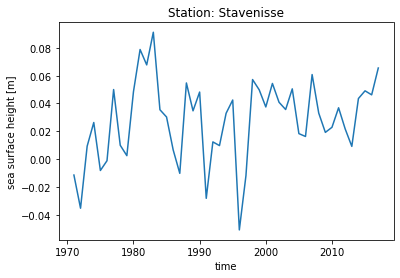

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(selection.index, selection['sea_surface_height']['mean'])
ax.set_xlabel('time')
ax.set_ylabel('sea surface height [m]')
ax.set_title('Station: Stavenisse')